download nltk_data folder from here : https://www.dropbox.com/sh/27t8ijq0elot8cw/AAAc8oe0d_mdtAhi3xk51ThEa?dl=0

# Example of Collecting Data from multiple files

download reuters_data from here : https://www.dropbox.com/sh/865xeu4xwbyo2yt/AACd0pQEbeOSfvNjiV7aur4Ka?dl=0

In [43]:
import os
import pandas as pd
import nltk
path=r"C:\Users\Saiganne\Documents\Data\Reuters Data\\"
files=os.listdir(path)

In [44]:
f=open(path+'training_money-fx_3593.txt','r',encoding='latin-1')

In [45]:
text=""
for line in f:
    if line.strip()=="":continue
    else:
        text+=' '+line.strip()
print(text)
f.close()

 HUNGARY HOPES DEVALUATION WILL END TRADE DEFICIT National Bank of Hungary first vice-president Janos Fekete said he hoped a planned eight pct devaluation of the forint will spur exports and redress last year's severe trade deficit with the West. Fekete told Reuters in an interview Hungary must achieve at least equilibrium on its hard currency trade. "It is useful to have a devaluation," he said. "There is now a real push to our exports and a bit of a curb to our imports." The official news agency MTI said today Hungary would devalue by eight pct and it expected the new rates to be announced later today. Fekete said the rates would come into effect tomorrow. He said one reason for the devaluation was that Hungary had a higher rate of inflation over the past two years than its main partners (around eight pct in 1985 and between five and 5.5 pct in 1986). This was partly an after-effect of action Hungary took to prevent inflation from soaring during the oil price shocks of the 1970s, he 

In [46]:
files

['training_crude_10011.txt',
 'training_crude_10078.txt',
 'training_crude_10080.txt',
 'training_crude_10106.txt',
 'training_crude_10168.txt',
 'training_crude_10190.txt',
 'training_crude_10192.txt',
 'training_crude_10200.txt',
 'training_crude_10228.txt',
 'training_crude_1026.txt',
 'training_crude_10268.txt',
 'training_crude_10395.txt',
 'training_crude_10406.txt',
 'training_crude_10452.txt',
 'training_crude_10539.txt',
 'training_crude_10567.txt',
 'training_crude_10588.txt',
 'training_crude_10620.txt',
 'training_crude_10621.txt',
 'training_crude_10627.txt',
 'training_crude_10632.txt',
 'training_crude_10641.txt',
 'training_crude_10669.txt',
 'training_crude_10693.txt',
 'training_crude_10750.txt',
 'training_crude_10797.txt',
 'training_crude_10845.txt',
 'training_crude_10873.txt',
 'training_crude_10947.txt',
 'training_crude_11007.txt',
 'training_crude_11025.txt',
 'training_crude_11100.txt',
 'training_crude_11118.txt',
 'training_crude_11149.txt',
 'training_crud

In [47]:
target=[]
article_text=[]
for file in files:
    if '.txt' not in file:continue
    f=open(path+file,encoding='latin-1')
    article_text.append(" ".join([line.strip() for line in
                                       f if line.strip()!=""]))
    if "crude" in file:
        target.append("crude")
    else:
        target.append("money")
    f.close()

In [48]:
mydata=pd.DataFrame({'target':target,'article_text':article_text})

In [49]:
mydata.head()

,target,article_text
0,crude,CANADA OIL EXPORTS RISE 20 PCT IN 1986 Canadia...
1,crude,BP &lt;BP> DOES NOT PLAN TO HIKE STANDARD &lt;...
2,crude,BP&lt;BP> OFFER RAISES EXPECTATIONS FOR OIL VA...
3,crude,USX &lt;X> SAYS TALKS ENDED WITH BRITISH PETRO...
4,crude,BP &lt;BP> MAY HAVE TO RAISE BID - ANALYSTS B...


# Text Data Exploration with word cloud

In [50]:
from wordcloud import WordCloud

In [51]:
import matplotlib.pyplot as plt
%matplotlib inline

In [52]:
all_articles=' '.join(mydata['article_text'])

In [53]:
crude_articles=" ".join(mydata.loc[mydata['target']=='crude','article_text'])

In [54]:
money_articles=" ".join(mydata.loc[mydata['target']=='money','article_text'])

(-0.5, 399.5, 199.5, -0.5)

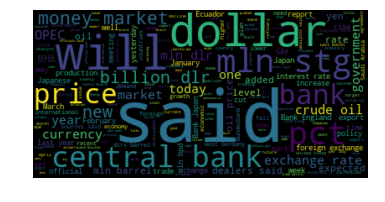

In [55]:
wordcloud = WordCloud().generate(all_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

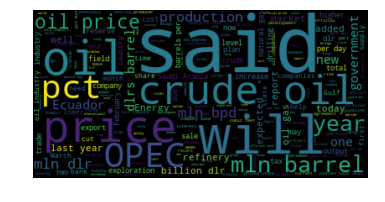

In [56]:
wordcloud = WordCloud().generate(crude_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

(-0.5, 399.5, 199.5, -0.5)

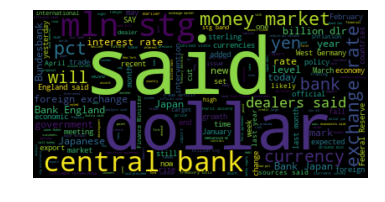

In [57]:
wordcloud = WordCloud().generate(money_articles)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# Text Data Exploration with nltk

In [58]:
from nltk import word_tokenize

In [59]:
tokens=word_tokenize(money_articles)

In [60]:
money_articles_Text=nltk.Text(tokens)

In [61]:
money_articles_Text.concordance('dlr')

Displaying 25 of 60 matches:
oil prices dropped from around the 30 dlr level . The index , base 1975 , close
JAPAN SETS ASIDE YEN FUNDS TO PREVENT DLR FALL The 50-day provisional 1987/88 b
JAPAN SETS ASIDE YEN FUNDS TO PREVENT DLR FALL The 50-day provisional 1987/88 b
erate with other nations to stabilize dlr , Sumita Japan will continue to coope
erate with other nations to stabilize dlr , Sumita SUMITA SAYS HE DOES NOT EXPE
ry economic restructuring , he said . DLR FALLS ON FEAR TOKYO WO N'T HIKE DEMAN
 nations committed in Paris to stable dlr above 150 yen Nakasone says major nat
 nations committed in Paris to stable dlr above 150 yen Miyazawa says major nat
ns have intervened aggressively since dlr fell below 150 yen Miyazawa says majo
ns have intervened aggressively since dlr fell below 150 yen G-6 WANTS TO HOLD 
 fell below 150 yen G-6 WANTS TO HOLD DLR ABOVE 150 YEN - NAKASONE Prime Minist
 cutting the country 's 169.8 billion dlr trade deficit , they said . BAHRAIN I
a year ago 

In [62]:
money_articles_Text.similar('bank')

dollar market fed bundesbank yen banks government treasury system
pound currencies rate economy currency meeting ems accord budget
report time


In [63]:
money_articles_Text.common_contexts(['dollar','dlr'])

says_level cut_sales further_decline hold_above the_nikkeiren


# Text Data features with tfidf 

In [64]:
from sklearn.feature_extraction.text import TfidfVectorizer  

In [65]:
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
lemma = WordNetLemmatizer()
my_stop=set(stopwords.words('english')+list(punctuation))

In [66]:
def split_into_lemmas(message):
    message=message.lower()
    words = word_tokenize(message)
    words_sans_stop=[]
    for word in words :
        if word in my_stop:continue
        words_sans_stop.append(word)
    return [lemma.lemmatize(word) for word in words_sans_stop]

In [67]:
tfidf= TfidfVectorizer(analyzer=split_into_lemmas,min_df=20,max_df=500,
                       stop_words=my_stop)

In [68]:
tfidf.fit(mydata['article_text'])

TfidfVectorizer(analyzer=<function split_into_lemmas at 0x000000001EAF0950>,
        binary=False, decode_error='strict', dtype=<class 'numpy.float64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=500,
        max_features=None, min_df=20, ngram_range=(1, 1), norm='l2',
        preprocessor=None, smooth_idf=True,
        stop_words={'had', 'we', "shan't", "wasn't", 'them', '(', ')', '<', 'or', 'him', "needn't", 'do', 'up', 'won', ':', 'a', 'against', 'themselves', 'she', 'any', 'very', ';', '+', '?', 'can', 're', "hasn't", 'doing', 'all', 'were', 'her', 'the', 'what', 'just', "haven't", '&', 'ours', '/', 'has', '\\'..., 'no', 'with', '[', '#', '~', "it's", 'couldn', '=', 'below', 'his', 'does', 'here', 'did', 'hers'},
        strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [69]:
tfidf_data=tfidf.transform(mydata['article_text'])

In [70]:
tfidf_data.shape

(927, 795)

In [71]:
tfidf_data

<927x795 sparse matrix of type '<class 'numpy.float64'>'
	with 46952 stored elements in Compressed Sparse Row format>

# Sentiment Analysis with nltk

In [72]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer=SentimentIntensityAnalyzer()

In [73]:
sentences = ["VADER is smart, handsome, and funny.",      # positive sentence example
            "VADER is not smart, handsome, nor funny.",   # negation sentence example
            "VADER is smart, handsome, and funny!",       # punctuation emphasis handled correctly (sentiment intensity adjusted)
            "VADER is very smart, handsome, and funny.",  # booster words handled correctly (sentiment intensity adjusted)
            "VADER is VERY SMART, handsome, and FUNNY.",  # emphasis for ALLCAPS handled
            "VADER is VERY SMART, handsome, and FUNNY!!!",# combination of signals - VADER appropriately adjusts intensity
            "VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!!",# booster words & punctuation make this close to ceiling for score
            "The book was good.",                                     # positive sentence
            "The book was kind of good.",                 # qualified positive sentence is handled correctly (intensity adjusted)
        '''The plot was good, but the characters are uncompelling and 
             the dialog is not great.''', # mixed negation sentence
            "At least it isn't a horrible book.",         # negated negative sentence with contraction
            "Make sure you :) or :D today!",              # emoticons handled
            "Today SUX!",                                 # negative slang with capitalization emphasis
            "Today only kinda sux! But I'll get by, lol"  # mixed sentiment example with slang and constrastive conjunction "but"
             ]


for sentence in sentences:
    vs = analyzer.polarity_scores(sentence)
    print(sentence, str(vs))

VADER is smart, handsome, and funny. {'neg': 0.0, 'neu': 0.254, 'pos': 0.746, 'compound': 0.8316}
VADER is not smart, handsome, nor funny. {'neg': 0.646, 'neu': 0.354, 'pos': 0.0, 'compound': -0.7424}
VADER is smart, handsome, and funny! {'neg': 0.0, 'neu': 0.248, 'pos': 0.752, 'compound': 0.8439}
VADER is very smart, handsome, and funny. {'neg': 0.0, 'neu': 0.299, 'pos': 0.701, 'compound': 0.8545}
VADER is VERY SMART, handsome, and FUNNY. {'neg': 0.0, 'neu': 0.246, 'pos': 0.754, 'compound': 0.9227}
VADER is VERY SMART, handsome, and FUNNY!!! {'neg': 0.0, 'neu': 0.233, 'pos': 0.767, 'compound': 0.9342}
VADER is VERY SMART, uber handsome, and FRIGGIN FUNNY!!! {'neg': 0.0, 'neu': 0.294, 'pos': 0.706, 'compound': 0.9469}
The book was good. {'neg': 0.0, 'neu': 0.508, 'pos': 0.492, 'compound': 0.4404}
The book was kind of good. {'neg': 0.0, 'neu': 0.657, 'pos': 0.343, 'compound': 0.3832}
The plot was good, but the characters are uncompelling and 
             the dialog is not great. {'neg'

# Language Correction, Detection and Translation with TextBlob

In [74]:
#!pip install textblob
from textblob import TextBlob 

In [75]:
b = TextBlob("I havv goood color !")
b.correct()

TextBlob("I have good color !")

In [76]:
chinese_blob = TextBlob(u"美丽优于丑陋")

In [77]:
chinese_blob.translate(from_lang="zh-CN", to='en')

TextBlob("Beauty is better than ugly")

In [78]:
b = TextBlob(u"بسيط هو أفضل من مجمع")

In [79]:
b.detect_language()

'ar'

# POS Tagging

source : https://stackoverflow.com/questions/1833252/java-stanford-nlp-part-of-speech-labels

* CC: conjunction, coordinating

    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
    
* CD: numeral, cardinal

    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
    
* DT: determiner

    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
    
* EX: existential there
    there
    
* FW: foreign word

    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
    
* IN: preposition or conjunction, subordinating

    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...
    
* JJ: adjective or numeral, ordinal

    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
    
* JJR: adjective, comparative

    bleaker braver breezier briefer brighter brisker broader bumper busier
    calmer cheaper choosier cleaner clearer closer colder commoner costlier
    cozier creamier crunchier cuter ...
    
* JJS: adjective, superlative

    calmest cheapest choicest classiest cleanest clearest closest commonest
    corniest costliest crassest creepiest crudest cutest darkest deadliest
    dearest deepest densest dinkiest ...
    
* LS: list item marker

    A A. B B. C C. D E F First G H I J K One SP-44001 SP-44002 SP-44005
    SP-44007 Second Third Three Two * a b c d first five four one six three
    two
    
* MD: modal auxiliary

    can cannot could couldn't dare may might must need ought shall should
    shouldn't will would
    
* NN: noun, common, singular or mass

    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
    
* NNS: noun, common, plural

    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...
    
* NNP: noun, proper, singular

    Motown Venneboerger Czestochwa Ranzer Conchita Trumplane Christos
    Oceanside Escobar Kreisler Sawyer Cougar Yvette Ervin ODI Darryl CTCA
    Shannon A.K.C. Meltex Liverpool ...
    
* NNPS: noun, proper, plural

    Americans Americas Amharas Amityvilles Amusements Anarcho-Syndicalists
    Andalusians Andes Andruses Angels Animals Anthony Antilles Antiques
    Apache Apaches Apocrypha ...
    
* PDT: pre-determiner

    all both half many quite such sure this
    
* POS: genitive marker
    ' 's

* PRP: pronoun, personal

    hers herself him himself hisself it itself me myself one oneself ours
    ourselves ownself self she thee theirs them themselves they thou thy us
    
* PRP$': pronoun, possessive

    her his mine my our ours their thy your
    
* RB: adverb

    occasionally unabatingly maddeningly adventurously professedly
    stirringly prominently technologically magisterially predominately
    swiftly fiscally pitilessly ...
    
* RBR: adverb, comparative

    further gloomier grander graver greater grimmer harder harsher
    healthier heavier higher however larger later leaner lengthier less-
    perfectly lesser lonelier longer louder lower more ...
    
* RBS: adverb, superlative

    best biggest bluntest earliest farthest first furthest hardest
    heartiest highest largest least less most nearest second tightest worst
    
* RP: particle

    aboard about across along apart around aside at away back before behind
    by crop down ever fast for forth from go high i.e. in into just later
    low more off on open out over per pie raising start teeth that through
    under unto up up-pp upon whole with you
    
* SYM: symbol

    % & ' '' ''. ) ). * + ,. < = > @ A[fj] U.S U.S.S.R * ** ***
    
* TO: "to" as preposition or infinitive marker

    to
    
* UH: interjection

    Goodbye Goody Gosh Wow Jeepers Jee-sus Hubba Hey Kee-reist Oops amen
    huh howdy uh dammit whammo shucks heck anyways whodunnit honey golly
    man baby diddle hush sonuvabitch ...
    
* VB: verb, base form

    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...
    
* VBD: verb, past tense

    dipped pleaded swiped regummed soaked tidied convened halted registered
    cushioned exacted snubbed strode aimed adopted belied figgered
    speculated wore appreciated contemplated ...
    
* VBG: verb, present participle or gerund

    telegraphing stirring focusing angering judging stalling lactating
    hankerin' alleging veering capping approaching traveling besieging
    encrypting interrupting erasing wincing ...
    
* VBN: verb, past participle

    multihulled dilapidated aerosolized chaired languished panelized used
    experimented flourished imitated reunifed factored condensed sheared
    unsettled primed dubbed desired ...
    
* VBP: verb, present tense, not 3rd person singular

    predominate wrap resort sue twist spill cure lengthen brush terminate
    appear tend stray glisten obtain comprise detest tease attract
    emphasize mold postpone sever return wag ...
    
* VBZ: verb, present tense, 3rd person singular

    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...
    
* WDT: WH-determiner
    that what whatever which whichever
    
* WP: WH-pronoun

    that what whatever whatsoever which who whom whosoever
    
* WP$: WH-pronoun, possessive

    whose
    
* WRB: Wh-adverb

    how however whence whenever where whereby whereever wherein whereof why

In [80]:
sentence = "We hope you love your sleepycat mattress. Welcom to the sleepycat community."

In [83]:
import nltk
#nltk.download('averaged_perceptron_tagger')
nltk.pos_tag(nltk.word_tokenize(sentence))

[('We', 'PRP'),
 ('hope', 'VBP'),
 ('you', 'PRP'),
 ('love', 'VB'),
 ('your', 'PRP$'),
 ('sleepycat', 'NN'),
 ('mattress', 'NN'),
 ('.', '.'),
 ('Welcom', 'NNP'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('sleepycat', 'NN'),
 ('community', 'NN'),
 ('.', '.')]